# Задание 7

### Задача
- Взять c kaggle или сгенерировать две выборки
- Применить к ним t-критерий Стьюдента для независимых выборок

### Требование к данным
- Непрерывные значения зависимой переменной
- Данные из двух выборок не взаимосвязаны
- Данные случайны
- Данные должны содержать хотя бы 6 значений
- Данные не содержат выбросов

### План
1. Сгенерирую выборки
2. Проверю однородность дисперсий используя тест Левене
   2.1 Если дисперсии неоднородны, применю t-тест Уэлча
   2.2 Если дисперсии однородны, применю t-тест Стьюдента для независимых выборок

### Размышления
Стоит сгенерировать не две, а три выборки и сравнивать их попарно так, чтоб пришлось применить t-тест Уэлча и по возможности получить разные результаты тестов для разных групп

In [8]:
from random import normalvariate
from random import randint
from math import sqrt
from pandas import read_excel
from numpy import std
from numpy import mean

In [9]:
dataLen=10 #размер выборок

In [18]:
mu1=randint(0, 100)
sigma1=randint(0, 100)
normalDistr1=[normalvariate(mu1, sigma1) for i in range(dataLen)]
normalDistr2=[normalvariate(mu1, sigma1) for i in range(dataLen)]
normalDistr3=[normalvariate(randint(0, 100),randint(0, 100)) for i in range(dataLen)]

Выборки готовы.
Напишу функцию для теста Левене:

In [30]:
def LeveneTest(data1, data2):
    sig1=std(data1)**2
    sig2=std(data2)**2
    df1=len(data1)-1
    df2=len(data2)-1
    LeveneCritVal=read_excel("LeveneCriterionCritVal.xlsx")[df1 if df1>df2 else df2][df2 if df1<df2 else df1]
    F=sig1/sig2 if sig1>sig2 else sig2/sig1
    isSignificant= False if F>LeveneCritVal else True
    return isSignificant
print(LeveneTest(normalDistr1, normalDistr2))
print(LeveneTest(normalDistr1, normalDistr3))

True
False


Работает

Теперь напишу функцию, которая будет вычислять t-критерий. Для этого организую две вспомогательных функции, каждая из которых будет вычислять t-критерий в зависимости от результатов теста Левене

In [43]:
def tCriterion(data1, data2):
    N1=len(data1)
    N2=len(data2)
    sig1=std(data1)**2
    sig2=std(data2)**2
    mean1=mean(data1)
    mean2=mean(data2)
    t=0
    if(LeveneTest(data1, data2)): t=tIfDispsEqual(N1, N2, sig1, sig2, mean1, mean2)
    else: t=tIfDispsNotEqual(N1, N2, sig1, sig2, mean1, mean2)
    return t, N1+N2-2

In [44]:
def tIfDispsEqual(N1, N2, sig1, sig2, mean1, mean2):
    
    numerator=abs(mean1 - mean2)
    denominator=sqrt(sig1/N1 + sig2/N2)
    t=numerator/denominator
    
    return t

In [45]:
def tIfDispsNotEqual(N1, N2, sig1, sig2, mean1, mean2):
    
    numerator=abs(mean1 - mean2)
    den1=(N1-1)*sig1 + (N2-1)*sig2
    den2= N1 + N2 - 2
    den3=1/N1+1/N2
    denominator=sqrt(den1/den2*den3)
    t=numerator/denominator
    
    return t

Теперь напишу функцию, которая сравнит полученное значение t-критерия с критическим табличным

In [64]:
def CheckTabT(empT, df):
    tabT=0
    array=read_excel("pairedCriterionCritVal.xlsx")
    for i in range(len(array["df"])):
        if array["df"][i]==df: tabT=array[0.05][i]
    if empT>tabT: return False
    if empT<=tabT: return True

Теперь напишу функцию, которая будет вызывать все остальные

In [56]:
def main(data1, data2):
    empT, df=tCriterion(data1, data2)
    areMeansEqual=CheckTabT(empT, df)
    if areMeansEqual==False: print("Средние статистически отличаются")
    if areMeansEqual==True: print("Средние статистически не отличаются")
    print()

### Результат

Для наглядности построю гистограммы распределения частот в наборах данных

In [57]:
import matplotlib.pyplot as plt

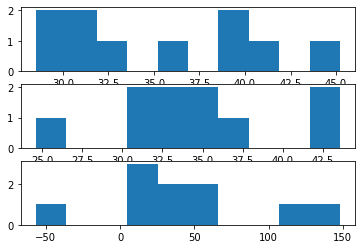

In [58]:
plt.figure(1)
plt.subplot(3,1,1)
plt.hist(normalDistr1);
plt.subplot(3,1,2)
plt.hist(normalDistr2);
plt.subplot(3,1,3)
plt.hist(normalDistr3);

In [65]:
print("№1 и №2")
main(normalDistr1, normalDistr2)
print("№1 и №3")
main(normalDistr1, normalDistr3)
print("№2 и №3")
main(normalDistr2, normalDistr3)

№1 и №2
Средние статистически не отличаются

№1 и №3
Средние статистически не отличаются

№2 и №3
Средние статистически не отличаются



### Выводы
- Все три датасета оказались статистически одинаковыми
- Функции работают корректно
- Необходимо научиться делать разные датасеты